**Including of necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib
import sklearn

Creating test and train arrays for the data

In [5]:
data = pd.read_csv("insurance.csv")

**Observe columns of data**

In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**Observe the relationship between age and BMI**

In [7]:
# Firstly, find the range of data
data.max()

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object

In [8]:
data.min()

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges     1121.8739
dtype: object

In [9]:
# Make a dictionary with ages as keys and bmis as values

ages = data["age"]
bmis = data["bmi"]

ageToBmi = dict(zip(ages, bmis))
ageToBmi = dict(sorted(ageToBmi.items(), key= lambda x: x[0]))



In [10]:
# Create empty arrays for unique ages and their mean bmis
uniqueAges = [18]
meanBmis = []

# Calculate average bmi for each age
mean = 0
count = 0
for i in range(len(ageToBmi.keys())):
  if list(ageToBmi.keys())[i] not in uniqueAges:
    meanBmis.append(mean/count)
    uniqueAges.append(list(ageToBmi.keys())[i])
    mean = 0
    count = 0
  mean += bmis[i]
  count += 1
meanBmis.append(mean/count)

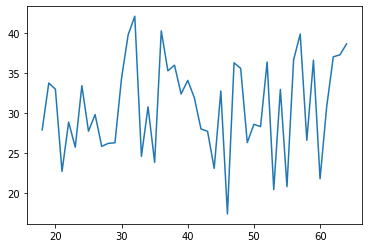

In [11]:
# Draw the diagram with average bmi to age

matplotlib.pyplot.plot(uniqueAges, meanBmis)
matplotlib.pyplot.show()

*Based on these graph, it cannot be said that BMI and age are linearly related*

**Observe the relationship between smoker and charges**

In [36]:
# Combine smoker and charges column
smoker = np.array(data["smoker"])
charges = np.array(data["charges"])

smoker

array(['yes', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

In [40]:
# Find the average charge based on smoker's situation
smoke, count = np.unique(smoker, return_counts = True)

smokeCount = dict(zip(smoke, count))

{'no': 1064, 'yes': 274}

In [47]:
smokeCharge = np.array(list(zip(smoker, charges)))

yesCharge = 0
noCharge = 0

for i in smokeCharge:
  if i[0] == "yes":
    yesCharge += float(i[1])
  else:
    noCharge += float(i[1])

yesMean = yesCharge/smokeCount["yes"]
noMean = noCharge/smokeCount["no"]

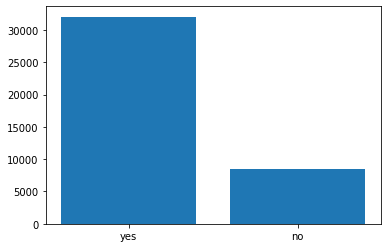

In [48]:
# Draw the bar diagram with smoker to mean charges

matplotlib.pyplot.bar(["yes", "no"], [yesMean, noMean])
matplotlib.pyplot.show()

*It can be seen that smokers pay much more than non-smokers*



Create a classification model to guess whether one is smoker or not based on the charge

In [59]:
# Encode the label
import sklearn.preprocessing
labelencoder = sklearn.preprocessing.LabelEncoder()

datasmoke = data.drop(data.columns.difference(["smoker","charges"]), 1)
datasmoke["smoker"] = labelencoder.fit_transform(datasmoke["smoker"].values) 
datasmoke.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,smoker,charges
0,1,16884.92400
1,0,1725.55230
2,0,4449.46200
3,0,21984.47061
4,0,3866.85520


In [62]:
# Create test and train data
import sklearn.model_selection

trainSmoke, testSmoke = sklearn.model_selection.train_test_split(datasmoke, test_size=0.3)

xTrain = trainSmoke.drop("smoker",axis=1)
yTrain = trainSmoke.loc[:,"smoker"]

xTest = testSmoke.drop("smoker",axis=1)
yTest = testSmoke.loc[:,"smoker"]

In [63]:
# Create the model
import sklearn.linear_model

modelS = sklearn.linear_model.LogisticRegression()

modelS.fit(xTrain, yTrain)

LogisticRegression()

In [64]:
# Make the predictions
predictS = modelS.predict(xTest)
predictS

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [65]:
# Evaluate the predictions
import sklearn.metrics

sklearn.metrics.confusion_matrix(yTest, predictS)

array([[315,  12],
       [ 30,  45]])

In [69]:
print(sklearn.metrics.classification_report(yTest,predictS))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       327
           1       0.79      0.60      0.68        75

    accuracy                           0.90       402
   macro avg       0.85      0.78      0.81       402
weighted avg       0.89      0.90      0.89       402



*From these results, it can be seen that Logistic Regression is accurate to predict whether one is smoker or not based on one's charge. However, it is more accurate to guess non-smokers than smokers.*

**Observe the Relationship Between Region and Smokers**

In [82]:
# Create region array and combine with smoker
region = np.array(data["region"])
regionSmoker = data.drop(data.columns.difference(["region", "smoker"]), 1)

uniqueRegion = np.unique(region)
uniqueRegion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [121]:
# Create a dictionary with the number of smokers based on regions
number = np.array([0, 0, 0, 0])

regSmoke = dict(zip(uniqueRegion, number))
regSmoke

{'northeast': 0, 'northwest': 0, 'southeast': 0, 'southwest': 0}

In [124]:
regionSmoker.head()

,smoker,region
0,yes,southwest
1,no,southeast
2,no,southeast
3,no,northwest
4,no,northwest


In [125]:
# Count smokers at each region
regSmokeYes, regSmokeNo = dict(regSmoke), dict(regSmoke)

for i in regionSmoker.iterrows():
  if i[1]["smoker"] == "yes":
    regSmokeYes[i[1]["region"]] += 1
  else:
    regSmokeNo[i[1]["region"]] += 1

print(regSmokeNo)
print(regSmokeYes)

{'northeast': 257, 'northwest': 267, 'southeast': 273, 'southwest': 267}
{'northeast': 67, 'northwest': 58, 'southeast': 91, 'southwest': 58}


In [126]:
# Calculate the percentage of smoking people at each region
regPerc = dict(regSmoke)

for i in regPerc.keys():
  regPerc[i] = (regSmokeYes[i]/(regSmokeYes[i]+regSmokeNo[i]))*100

regPerc

{'northeast': 20.679012345679013,
 'northwest': 17.846153846153847,
 'southeast': 25.0,
 'southwest': 17.846153846153847}

PIE CHART OF SMOKERS IN NORTHEAST


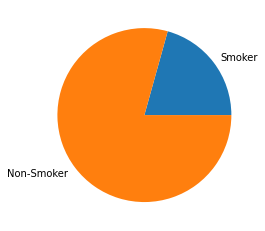

PIE CHART OF SMOKERS IN NORTHWEST


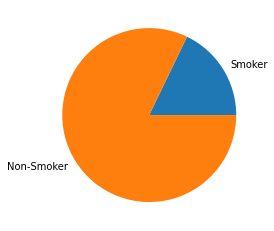

PIE CHART OF SMOKERS IN SOUTHEAST


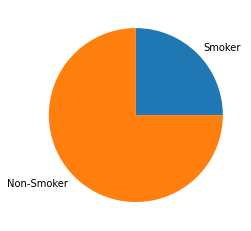

PIE CHART OF SMOKERS IN SOUTHWEST


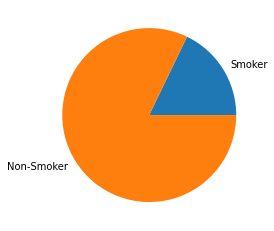

In [134]:
# Draw the pie chart for each region

for i in regPerc.keys():
  print(f"PIE CHART OF SMOKERS IN {i.upper()}")
  
  matplotlib.pyplot.pie([regSmokeYes[i], regSmokeNo[i]], labels=["Smoker", "Non-Smoker"])
  matplotlib.pyplot.show()

*It can be seen that smokers are in minorty in each region*

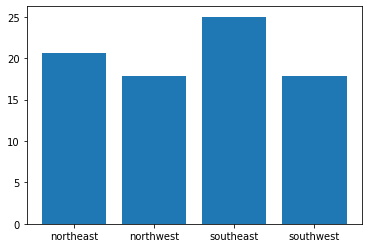

In [136]:
# Draw a bar diagram for the percentage of smokers in each region

matplotlib.pyplot.bar(regPerc.keys(), regPerc.values())
matplotlib.pyplot.show()

*The graph shows that percentage of smokers to the population in each region is below 25%. However, southeast region has the highest percentage*

**Observe the Relationship Between BMI and SEX**

In [138]:
# Create BMI to Sex data
sexBMI = data.drop(data.columns.difference(["bmi", "sex"]), 1)

sexBMI.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,sex,bmi
1333,male,30.97
1334,female,31.92
1335,female,36.85
1336,female,25.80
1337,female,29.07


In [139]:
# Calculate the average value of BMI based on sex
male = [0, 0]
female = [0, 0]

for i, row in sexBMI.iterrows():
  if row["sex"] == "male":
    male[0] += 1
    male[1] += row["bmi"]
  else:
    female[0] += 1
    female[1] += row["bmi"]

print(male)
print(female)

[676, 20917.554999999986]
[662, 20110.07000000002]


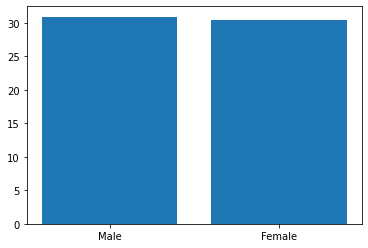

In [140]:
# Draw a bar graphic to compare the effect of sex on the BMI

matplotlib.pyplot.bar(["Male", "Female"], [male[1]/male[0], female[1]/female[0]])
matplotlib.pyplot.show()

**Observe the Relationship Between BMI and CHARGES**

In [148]:
# Create BMI to Charges data
charges = data["charges"]
charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

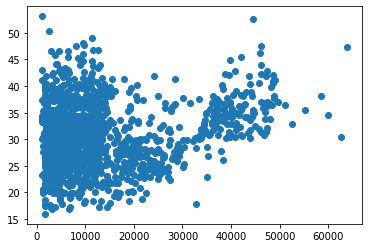

In [151]:
# Draw a scatter graphic to compare the effect of charges on the BMI

matplotlib.pyplot.scatter(charges, bmis)
matplotlib.pyplot.show()

*Based on the location of dots, it can be said that charge is an outlier for BMI*

**Observe the Relationship Between Children and Region**

In [141]:
# Create children to region data
childReg = data.drop(data.columns.difference(["children", "region"]), 1)

childReg.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,children,region
1333,3,northwest
1334,0,northeast
1335,0,southeast
1336,0,southwest
1337,0,northwest


In [142]:
# Create a dictionary for the children number to region
childRegion = dict(zip(uniqueRegion, np.array([0, 0, 0, 0])))

childRegion

{'northeast': 0, 'northwest': 0, 'southeast': 0, 'southwest': 0}

In [143]:
# Calculate the number of children at each region
for i, row in childReg.iterrows():
  childRegion[row["region"]] += row["children"]

childRegion

{'northeast': 339, 'northwest': 373, 'southeast': 382, 'southwest': 371}

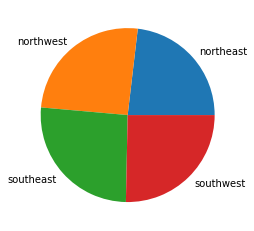

Region with the most children is southeast with 382 children


In [146]:
# Draw a pie chart for the each region
matplotlib.pyplot.pie(childRegion.values(), labels=childRegion.keys())
matplotlib.pyplot.show()

print(f"Region with the most children is {max(childRegion, key=childRegion.get)} with {childRegion[max(childRegion, key=childRegion.get)]} children")

**Observe the Relationship Between BMI, Region, and Smoker**

In [152]:
# Create the data
BMIregionSmoker = data.drop(data.columns.difference(["bmi", "region", "smoker"]), 1)

BMIregionSmoker

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,bmi,smoker,region
0,27.900,yes,southwest
1,33.770,no,southeast
2,33.000,no,southeast
3,22.705,no,northwest
4,28.880,no,northwest
...,...,...,...
1333,30.970,no,northwest
1334,31.920,no,northeast
1335,36.850,no,southeast
1336,25.800,no,southwest


In [161]:
# Dictionaries
bmiSum = {"northwest": {"yes": 0, "no": 0},
          "southwest": {"yes": 0, "no": 0},
          "northeast": {"yes": 0, "no": 0},
          "southeast": {"yes": 0, "no": 0},
          }

bmiCount = {"northwest": {"yes": 0, "no": 0},
          "southwest": {"yes": 0, "no": 0},
          "northeast": {"yes": 0, "no": 0},
          "southeast": {"yes": 0, "no": 0},
          }

for i, row in BMIregionSmoker.iterrows():
  bmiSum[row["region"]][row["smoker"]] += row["bmi"]
  bmiCount[row["region"]][row["smoker"]] += 1

print(bmiSum)
print(bmiCount)

{'northwest': {'yes': 1690.1449999999998, 'no': 7799.784999999996}, 'southwest': {'yes': 1798.3, 'no': 8145.600000000009}, 'northeast': {'yes': 1913.8700000000001, 'no': 7538.345000000004}, 'southeast': {'yes': 3011.800000000001, 'no': 9129.779999999997}}
{'northwest': {'yes': 58, 'no': 267}, 'southwest': {'yes': 58, 'no': 267}, 'northeast': {'yes': 67, 'no': 257}, 'southeast': {'yes': 91, 'no': 273}}


In [162]:
bmiAverages = {"northwest": {"yes": 0, "no": 0},
          "southwest": {"yes": 0, "no": 0},
          "northeast": {"yes": 0, "no": 0},
          "southeast": {"yes": 0, "no": 0},
          }

for i in bmiAverages.keys():
  bmiAverages[i]["yes"] = bmiSum[i]["yes"] / bmiCount[i]["yes"]
  bmiAverages[i]["no"] = bmiSum[i]["no"] / bmiCount[i]["no"]

bmiAverages

{'northwest': {'yes': 29.140431034482756, 'no': 29.21267790262171},
 'southwest': {'yes': 31.0051724137931, 'no': 30.507865168539357},
 'northeast': {'yes': 28.565223880597017, 'no': 29.332081712062273},
 'southeast': {'yes': 33.09670329670331, 'no': 33.44241758241757}}

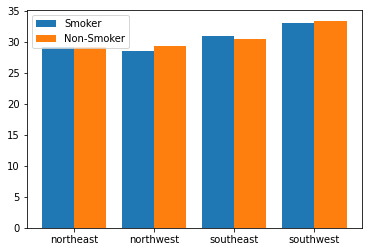

In [175]:
# Draw a bar graphic to compare the effect of sex on the BMI
xAxis = np.arange(len(uniqueRegion))

matplotlib.pyplot.bar(xAxis -0.2, [bmiAverages["northwest"]["yes"], bmiAverages["northeast"]["yes"], bmiAverages["southwest"]["yes"], bmiAverages["southeast"]["yes"],], width=0.4, label = 'Smoker')
matplotlib.pyplot.bar(xAxis +0.2, [bmiAverages["northwest"]["no"], bmiAverages["northeast"]["no"], bmiAverages["southwest"]["no"], bmiAverages["southeast"]["no"],], width=0.4, label = 'Non-Smoker')

matplotlib.pyplot.xticks(xAxis, uniqueRegion)

matplotlib.pyplot.legend()

matplotlib.pyplot.show()

**MODELIZATION**

In [176]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [177]:
data["smoker"] = labelencoder.fit_transform(data["smoker"].values) 
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [178]:
data["smoker"] = labelencoder.fit_transform(data["smoker"].values) 
data["sex"] = labelencoder.fit_transform(data["sex"].values)
data["region"] = labelencoder.fit_transform(data["region"].values)
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [180]:
trainData, testData = sklearn.model_selection.train_test_split(data, test_size=0.3)

In [179]:
model = sklearn.linear_model.LinearRegression()

In [182]:
trainX = trainData.drop("bmi", axis=1)
trainY = trainData.loc[:, "bmi"]

In [183]:
trainY

844     30.495
1175    27.100
428     16.815
873     30.100
551     28.930
         ...  
1151    36.480
809     25.840
194     34.430
956     30.800
312     35.970
Name: bmi, Length: 936, dtype: float64

In [184]:
model.fit(trainX, trainY)

LinearRegression()

In [185]:
testX = testData.drop("bmi", axis=1)
testY = testData.loc[:, "bmi"]

In [189]:
predict = model.predict(testX)

In [192]:
rmse = np.sqrt(sklearn.metrics.mean_squared_error((testY), predict))
rmse

5.607044276073445

In [194]:
compare = pd.DataFrame({"Actual Values": testY, "Predictions": predict})
compare

,Actual Values,Predictions
1222,25.300,31.319004
1052,29.830,29.910858
298,34.390,32.142188
398,25.600,33.545397
453,29.735,28.939799
...,...,...
156,24.420,28.151184
973,40.500,29.788607
843,29.810,29.182143
700,34.870,29.081888


In [198]:
correlations = trainData.corr()
correlations

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020549,0.155286,0.037789,-0.021730,0.018587,0.296025
sex,-0.020549,1.000000,0.044894,0.018558,0.081287,-0.006882,0.047588
bmi,0.155286,0.044894,1.000000,0.007760,-0.000518,0.141806,0.203933
children,0.037789,0.018558,0.007760,1.000000,-0.002614,0.023357,0.051764
smoker,-0.021730,0.081287,-0.000518,-0.002614,1.000000,-0.021944,0.789847
region,0.018587,-0.006882,0.141806,0.023357,-0.021944,1.000000,-0.008837
charges,0.296025,0.047588,0.203933,0.051764,0.789847,-0.008837,1.000000


In [201]:
bmiCorrelation = correlations["bmi"]
bmiCorrelation.sort_values(ascending=False)

bmi         1.000000
charges     0.203933
age         0.155286
region      0.141806
sex         0.044894
children    0.007760
smoker     -0.000518
Name: bmi, dtype: float64

*These results show that BMI is not very dependent on these features*

**CLASSIFICATION OF SMOKERS**

In [202]:
trainSmoke, testSmoke = sklearn.model_selection.train_test_split(data, test_size=0.3)

xTrain = trainSmoke.drop("smoker",axis=1)
yTrain = trainSmoke.loc[:,"smoker"]

xTest = testSmoke.drop("smoker",axis=1)
yTest = testSmoke.loc[:,"smoker"]

In [204]:
modelSmoke1 = sklearn.linear_model.LogisticRegression()
modelSmoke1.fit(xTrain, yTrain)

LogisticRegression()

In [206]:
predictSmoke1 = modelSmoke1.predict(xTest)
predictSmoke1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [207]:
sklearn.metrics.confusion_matrix(yTest, predictSmoke1)

array([[306,  10],
       [ 28,  58]])

In [208]:
print(sklearn.metrics.classification_report(yTest, predictSmoke1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       316
           1       0.85      0.67      0.75        86

    accuracy                           0.91       402
   macro avg       0.88      0.82      0.85       402
weighted avg       0.90      0.91      0.90       402



*From these results, it can be seen that Logistic Regression is accurate to predict whether one is smoker or not based on these features. However, it is more accurate to guess non-smokers than smokers.*

***Prepared by Demet Şeker and Kerem Yurtseven***
